<a href="https://colab.research.google.com/github/zephstee/machine_learning-Project/blob/main/Electricity_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ELECTRICITY PRICE PREDICTION**



Running an airport is a multifaceted endeavor, riddled with uncertainties, even when armed with data analytics to guide decision-making.

Every aspect of airport operations hinges on a vital resource: electricity. From powering bustling terminals to fueling critical navigation systems, electricity is the lifeblood of airport functionality. As airports expand in size and complexity to meet the demands of modern air travel, the reliance on electricity grows exponentially. The ability to accurately forecast electricity prices is paramount, as fluctuations in energy costs can significantly impact airport operations, budgetary planning, and sustainability efforts.

In this project, I embark on the exciting journey of developing a machine learning model to predict electricity prices, utilizing historical data sourced from Cork Airport. Through meticulous analysis and advanced modeling techniques, the objective is to provide actionable insights into electricity price dynamics, empowering stakeholders within the aviation industry to make informed decisions and optimize resource allocation. By harnessing the power of data analytics and predictive modeling, this project seeks to address the evolving needs of airport management and contribute to the advancement of sustainable, efficient, and resilient airport operations. 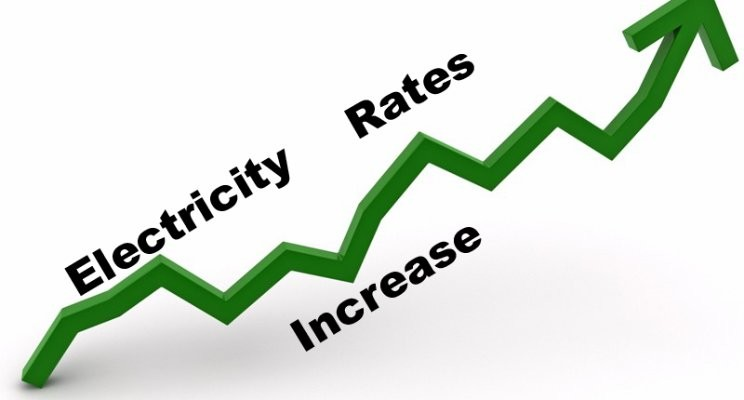



**Column Description**

**DateTime** : Defines date and time of samples

**Holiday** : States the name of the holiday if the date is a bank holiday

**HolidayFlag** : Flag for bank holiday; 1 if holiday, 0 if not

**DayOfWeek** : Identifier for day of the week; 0 to 6 for Monday through Sunday

**WeekOfYear** : Identifier for week of the year; 0 to 52

**PeriodOfDay** : Identifier for the half-hour interval of a given day; 0 to 47

**ForecastWindProduction** : Forecasted power production from wind

**ForecastSystemLoad** : Forecast of the power grid system load

**ActualEP** : National forecast of the electricity price

**Temperature** : Actual temperature measured at Cork Airport

**Windspeed** : Actual wind speed measured at Cork Airport

**CO2Intensity** : Actual CO2 intensity of power production in g/kWh

**ActualWindProduction** : Actual power production from wind

**ActualSystemLoad** : Actual power grid system load

**ActualEP** : The actual price of electricity (price to be forecasted)

**Importing Libraries**

In [588]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

**Loading and Renaming the Dataset**

In [589]:
df = pd.read_excel("/content/Electricity_price.xlsx")
df.rename(columns = {'SystemLoadEA':'ForecastSystemLoad','SMPEA':'ForecastEP','ORKTemperature':'Temperature','ORKWindspeed':'Windspeed','SystemLoadEP2':'ActualSystemLoad','SMPEP2':'ActualEP'},inplace=True)
df

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,PeriodOfDay,ForecastWindProduction,ForecastSystemLoad,ForecastEP,Temperature,Windspeed,CO2Intensity,ActualWindProduction,ActualSystemLoad,ActualEP
0,2011-11-01 00:00:00,NaN,0,1,44,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.0,3159.60,54.32
1,2011-11-01 00:30:00,NaN,0,1,44,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.0,2973.01,54.23
2,2011-11-01 01:00:00,NaN,0,1,44,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.0,2834.00,54.23
3,2011-11-01 01:30:00,NaN,0,1,44,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.0,2725.99,53.47
4,2011-11-01 02:00:00,NaN,0,1,44,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.0,2655.64,39.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38009,2013-12-31 21:30:00,New Year's Eve,1,1,1,43,1179.14,3932.22,34.51,6.00,22.20,285.31,812.0,3692.95,42.45
38010,2013-12-31 22:00:00,New Year's Eve,1,1,1,44,1152.01,3821.44,33.83,5.00,24.10,278.31,852.0,3571.00,33.83
38011,2013-12-31 22:30:00,New Year's Eve,1,1,1,45,1123.67,3724.21,31.75,4.00,20.40,280.91,962.0,3460.29,31.75
38012,2013-12-31 23:00:00,New Year's Eve,1,1,1,46,1094.24,3638.16,33.83,5.00,14.80,302.46,950.0,3563.99,50.60


**The First 5 Rows**

In [590]:
df.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,PeriodOfDay,ForecastWindProduction,ForecastSystemLoad,ForecastEP,Temperature,Windspeed,CO2Intensity,ActualWindProduction,ActualSystemLoad,ActualEP
0,2011-11-01 00:00:00,NaN,0,1,44,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.0,3159.60,54.32
1,2011-11-01 00:30:00,NaN,0,1,44,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.0,2973.01,54.23
2,2011-11-01 01:00:00,NaN,0,1,44,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.0,2834.00,54.23
3,2011-11-01 01:30:00,NaN,0,1,44,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.0,2725.99,53.47
4,2011-11-01 02:00:00,NaN,0,1,44,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.0,2655.64,39.87


**The Last 5 Rows**

In [591]:
df.tail()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,PeriodOfDay,ForecastWindProduction,ForecastSystemLoad,ForecastEP,Temperature,Windspeed,CO2Intensity,ActualWindProduction,ActualSystemLoad,ActualEP
38009,2013-12-31 21:30:00,New Year's Eve,1,1,1,43,1179.14,3932.22,34.51,6.00,22.20,285.31,812.0,3692.95,42.45
38010,2013-12-31 22:00:00,New Year's Eve,1,1,1,44,1152.01,3821.44,33.83,5.00,24.10,278.31,852.0,3571.00,33.83
38011,2013-12-31 22:30:00,New Year's Eve,1,1,1,45,1123.67,3724.21,31.75,4.00,20.40,280.91,962.0,3460.29,31.75
38012,2013-12-31 23:00:00,New Year's Eve,1,1,1,46,1094.24,3638.16,33.83,5.00,14.80,302.46,950.0,3563.99,50.60
38013,2013-12-31 23:30:00,New Year's Eve,1,1,1,47,1064.00,3624.25,33.83,5.00,16.70,308.01,1020.0,3517.08,34.90


**Number of Rows and Columns**

In [592]:
df.shape

(38014, 15)

**Column Names**

In [593]:
df.columns

Index(['DateTime', 'Holiday', 'HolidayFlag', 'DayOfWeek', 'WeekOfYear',
       'PeriodOfDay', 'ForecastWindProduction', 'ForecastSystemLoad',
       'ForecastEP', 'Temperature', 'Windspeed', 'CO2Intensity',
       'ActualWindProduction', 'ActualSystemLoad', 'ActualEP'],
      dtype='object')

**Information of each columns**

In [594]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DateTime                38014 non-null  datetime64[ns]
 1   Holiday                 1536 non-null   object        
 2   HolidayFlag             38014 non-null  int64         
 3   DayOfWeek               38014 non-null  int64         
 4   WeekOfYear              38014 non-null  int64         
 5   PeriodOfDay             38014 non-null  int64         
 6   ForecastWindProduction  38009 non-null  float64       
 7   ForecastSystemLoad      38012 non-null  float64       
 8   ForecastEP              38012 non-null  float64       
 9   Temperature             38014 non-null  object        
 10  Windspeed               38014 non-null  object        
 11  CO2Intensity            38007 non-null  float64       
 12  ActualWindProduction    38009 non-null  float6

**Statistical Informations**

In [595]:
df.describe()

,DateTime,HolidayFlag,DayOfWeek,WeekOfYear,PeriodOfDay,ForecastWindProduction,ForecastSystemLoad,ForecastEP,CO2Intensity,ActualWindProduction,ActualSystemLoad,ActualEP
count,38014,38014.000000,38014.000000,38014.000000,38014.000000,38009.000000,38012.000000,38012.000000,38007.000000,38009.000000,38012.000000,38012.000000
mean,2012-12-01 00:04:00.685010688,0.040406,2.997317,28.124586,23.501105,544.261451,4020.085019,62.720388,479.373040,520.762819,3785.973841,64.136823
min,2011-11-01 00:00:00,0.000000,0.000000,1.000000,0.000000,0.680000,2183.940000,0.000000,0.000000,1.000000,1809.960000,-47.740000
25%,2012-05-17 00:37:30,0.000000,1.000000,15.000000,12.000000,189.670000,3281.207500,45.530000,421.105000,199.000000,3058.277500,45.780000
50%,2012-12-01 00:15:00,0.000000,3.000000,29.000000,24.000000,441.980000,4103.600000,55.230000,480.310000,445.000000,3865.745000,55.545000
75%,2013-06-16 23:52:30,0.000000,5.000000,43.000000,35.750000,839.460000,4638.532500,70.320000,537.520000,793.000000,4427.590000,72.110000
max,2013-12-31 23:30:00,1.000000,6.000000,52.000000,47.000000,1680.000000,6492.910000,587.580000,842.880000,1769.000000,6309.750000,1000.000000
std,NaN,0.196912,1.999959,15.587575,13.853108,414.364629,860.476866,32.252334,85.354706,378.282975,843.269455,35.415036


In [596]:
df.describe(include = 'O')

,Holiday,Temperature,Windspeed
count,1536,38014,38014
unique,14,32,53
top,Christmas Eve,9.00,14.80
freq,144,3525,3208


**Checking for Duplicate Values**

In [597]:
df.duplicated().sum()

0

# Data Preprocessing

**Converts a string-like representation of a number to a Numeric Type**

In [598]:
df["Temperature"] = pd.to_numeric(df["Temperature"], errors= 'coerce')
df["Windspeed"] = pd.to_numeric(df["Windspeed"], errors= 'coerce')
df.dtypes

DateTime                  datetime64[ns]
Holiday                           object
HolidayFlag                        int64
DayOfWeek                          int64
WeekOfYear                         int64
PeriodOfDay                        int64
ForecastWindProduction           float64
ForecastSystemLoad               float64
ForecastEP                       float64
Temperature                      float64
Windspeed                        float64
CO2Intensity                     float64
ActualWindProduction             float64
ActualSystemLoad                 float64
ActualEP                         float64
dtype: object

**Checking for Missing Values**

In [599]:
df.isna().sum()

DateTime                      0
Holiday                   36478
HolidayFlag                   0
DayOfWeek                     0
WeekOfYear                    0
PeriodOfDay                   0
ForecastWindProduction        5
ForecastSystemLoad            2
ForecastEP                    2
Temperature                 295
Windspeed                   299
CO2Intensity                  7
ActualWindProduction          5
ActualSystemLoad              2
ActualEP                      2
dtype: int64

**Handling Missing Values**

In [600]:
df['ForecastWindProduction'].fillna(df['ForecastWindProduction'].mean(),inplace=True)
df['ForecastSystemLoad'].fillna(df['ForecastSystemLoad'].mean(),inplace=True)
df['ForecastEP'].fillna(df['ForecastEP'].mean(),inplace=True)
df['Temperature'].fillna(df['Temperature'].mean(),inplace=True)
df['Windspeed'].fillna(df['Windspeed'].mean(),inplace=True)
df['CO2Intensity'].fillna(df['CO2Intensity'].mean(),inplace=True)
df['ActualWindProduction'].fillna(df['ActualWindProduction'].mean(),inplace=True)
df['ActualSystemLoad'].fillna(df['ActualSystemLoad'].mean(),inplace=True)
df['ActualEP'].fillna(df['ActualEP'].mean(),inplace=True)

df.isna().sum()

DateTime                      0
Holiday                   36478
HolidayFlag                   0
DayOfWeek                     0
WeekOfYear                    0
PeriodOfDay                   0
ForecastWindProduction        0
ForecastSystemLoad            0
ForecastEP                    0
Temperature                   0
Windspeed                     0
CO2Intensity                  0
ActualWindProduction          0
ActualSystemLoad              0
ActualEP                      0
dtype: int64

**Calculating value_counts for each column using a loop**

In [601]:
for i in df:
  count = df[i].value_counts()
  print('Count of',i)
  print("_"*25)
  print(count)
  print("*"*100)
  print()

Count of DateTime
_________________________
DateTime
2011-11-01 00:00:00    1
2013-04-11 21:30:00    1
2013-04-11 22:30:00    1
2013-04-11 23:00:00    1
2013-04-11 23:30:00    1
                      ..
2012-07-22 00:30:00    1
2012-07-22 01:00:00    1
2012-07-22 01:30:00    1
2012-07-22 02:00:00    1
2013-12-31 23:30:00    1
Name: count, Length: 38014, dtype: int64
****************************************************************************************************

Count of Holiday
_________________________
Holiday
Christmas Eve           144
Christmas               144
St Stephen's Day        144
New Year's Eve          144
New Year's Day           96
St Patrick's Day         96
Good Friday              96
Holy Saturday            96
Easter                   96
Easter Monday            96
May Day                  96
June Bank Holiday        96
August Bank Holiday      96
October Bank Holiday     96
Name: count, dtype: int64
************************************************************

**Extracting Features from DateTime column**

In [602]:
df['DateTime']==pd.to_datetime(df['DateTime'])
df['Year']=df['DateTime'].dt.year
df['Month']=df['DateTime'].dt.month
df['Day']=df['DateTime'].dt.day

**Explorative Data Analysis**

Visualize the dataset to uncover valuable insights, trends, and relationships

Text(0, 0.5, 'Count')

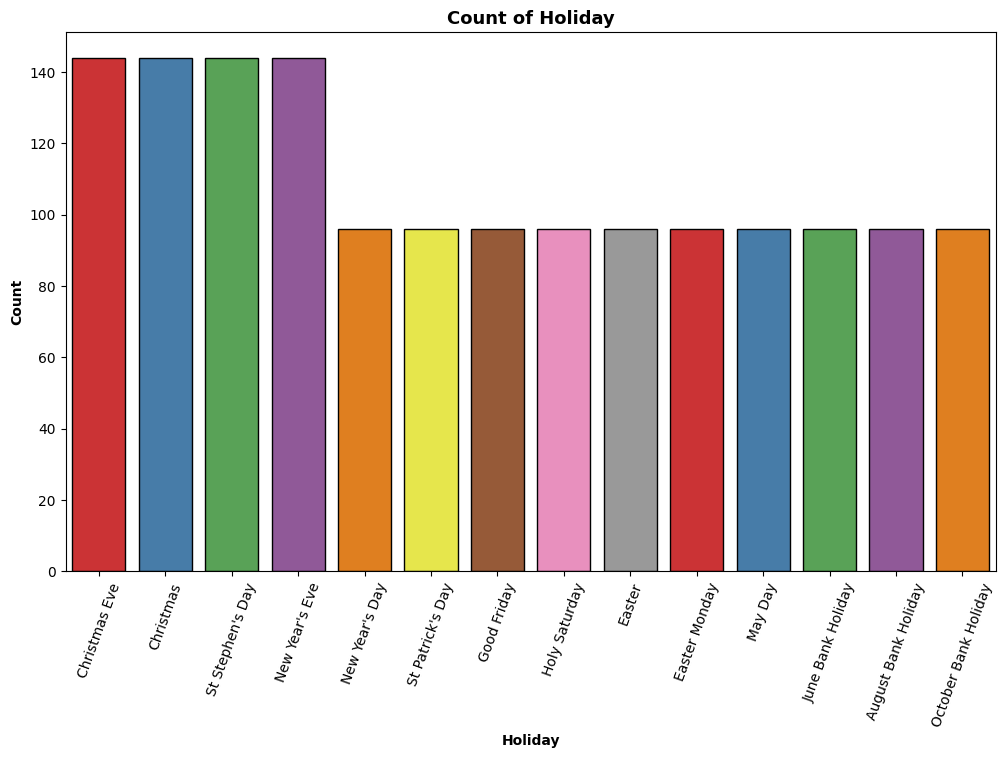

In [603]:
plt.subplots(figsize = (12,7))
sns.countplot(x = 'Holiday', data = df, ec ='black', palette ='Set1', order = df['Holiday'].value_counts().index)
plt.xticks(rotation=70)
plt.title("Count of Holiday", weight="bold", fontsize=13)
plt.xlabel("Holiday", weight="bold", fontsize=10)
plt.ylabel("Count", weight="bold", fontsize=10)

The count plot graph displays the frequency of holidays within the dataset. Notably, Christmas Eve, Christmas, St. Stephen's Day and New Year's Eve  exhibit the highest counts, suggesting repeated occurrences of these holidays.

Text(0, 0.5, 'Count')

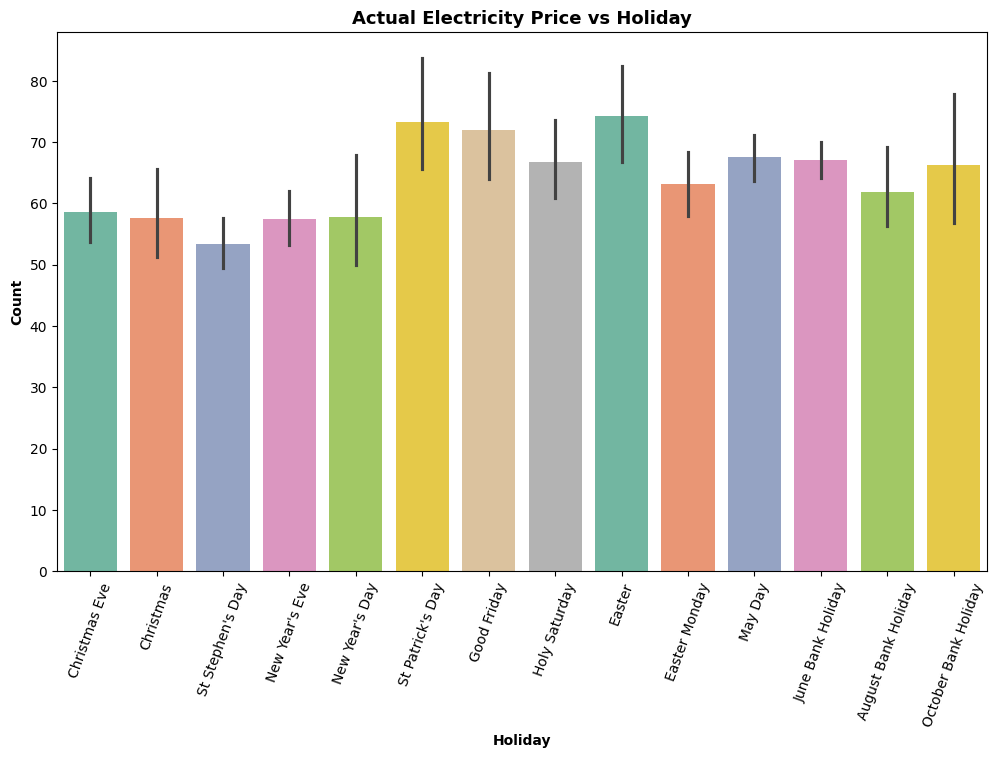

In [604]:
plt.subplots(figsize = (12,7))
sns.barplot(x ='Holiday', y ='ActualEP', data = df, palette = "Set2")
plt.xticks(rotation=70)
plt.title("Actual Electricity Price vs Holiday", weight = "bold", fontsize= 13)
plt.xlabel("Holiday", weight = "bold", fontsize = 10)
plt.ylabel("Count", weight = "bold", fontsize = 10)

This graph illustrates the relationship between holidays and actual electricity prices. Interestingly, St. Patrick's Day emerges as the holiday with the highest actual electricity price, followed closely by Easter. This analysis sheds light on the impact of holidays on electricity prices and highlights notable fluctuations associated with specific occasions.

Text(0, 0.5, 'Electricity Price')

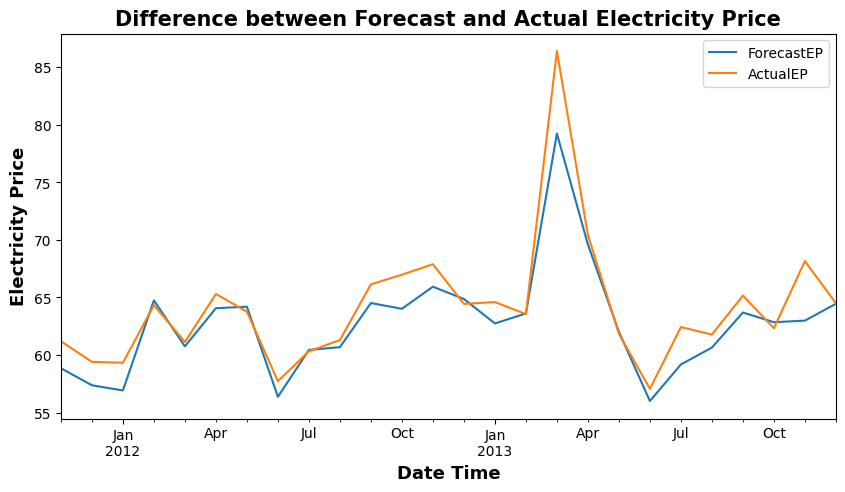

In [605]:
time = df.set_index('DateTime')
time[['ForecastEP','ActualEP']].resample('M').mean().plot(figsize = (10,5))
plt.title("Difference between Forecast and Actual Electricity Price", weight = "bold", fontsize = 15)
plt.xlabel("Date Time", weight = "bold", fontsize = 13)
plt.ylabel("Electricity Price", weight = "bold", fontsize = 13)

The time series analysis graph illustrates the difference between forecasted and actual electricity prices over time. It's evident that actual electricity prices consistently surpass forecasted prices, indicating potential forecasting inaccuracies. Additionally, there is a peak point in March 2013, where electricity prices reach their highest level. This period coincides with significant fluctuations in electricity prices over time, highlighting the dynamic nature of price dynamics in the dataset.

Text(0, 0.5, 'Electricity Price')

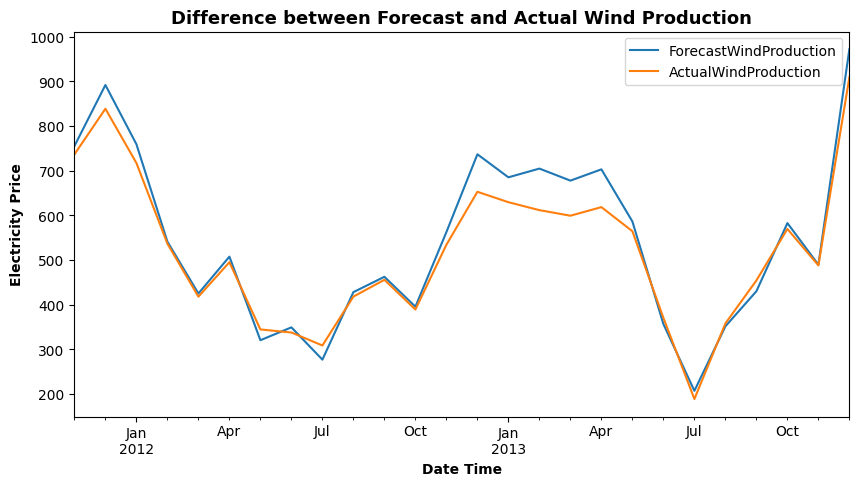

In [606]:
time[['ForecastWindProduction','ActualWindProduction']].resample('M').mean().plot(figsize = (10,5))
plt.title("Difference between Forecast and Actual Wind Production", weight = "bold", fontsize = 13)
plt.xlabel("Date Time", weight = "bold", fontsize = 10)
plt.ylabel("Electricity Price", weight = "bold", fontsize = 10)

The comparison between forecasted and actual wind production reveals minimal disparity, suggesting accurate forecasting. Notably, periods of low wind production, such as July 2013, may coincide with higher electricity prices due to decreased availability of wind energy for power generation.

Text(0, 0.5, 'Electricity Price')

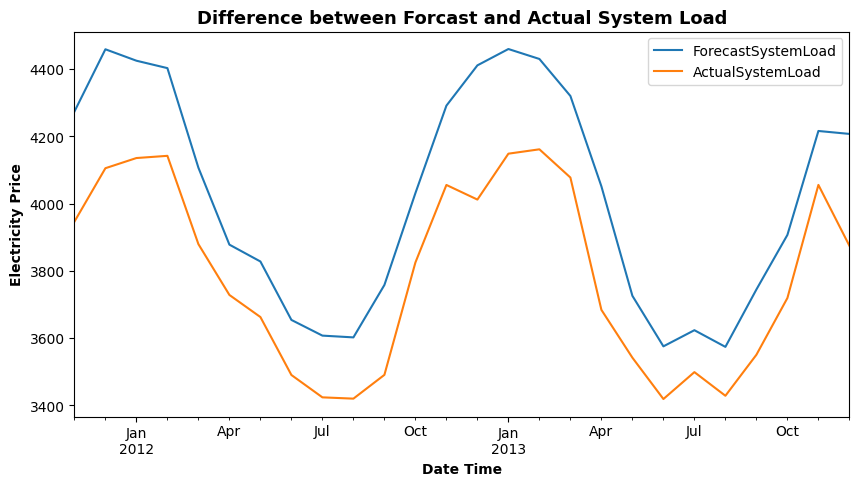

In [607]:
time[['ForecastSystemLoad','ActualSystemLoad']].resample('M').mean().plot(figsize = (10,5))
plt.title("Difference between Forcast and Actual System Load", weight = "bold", fontsize = 13)
plt.xlabel("Date Time", weight = "bold", fontsize = 10)
plt.ylabel("Electricity Price", weight = "bold", fontsize = 10)

The graph illustrates the difference between forecasted and actual system load over time, revealing significant disparities at key points. Specifically, December 2011 and January 2013 stand out for having the highest differences between forecasted and actual system load. These periods coincide with peak points in electricity prices, indicating a potential correlation between increased system load and higher electricity prices.

As actual system load increases, it can exert upward pressure on electricity prices, underscoring the impact of demand dynamics on pricing.

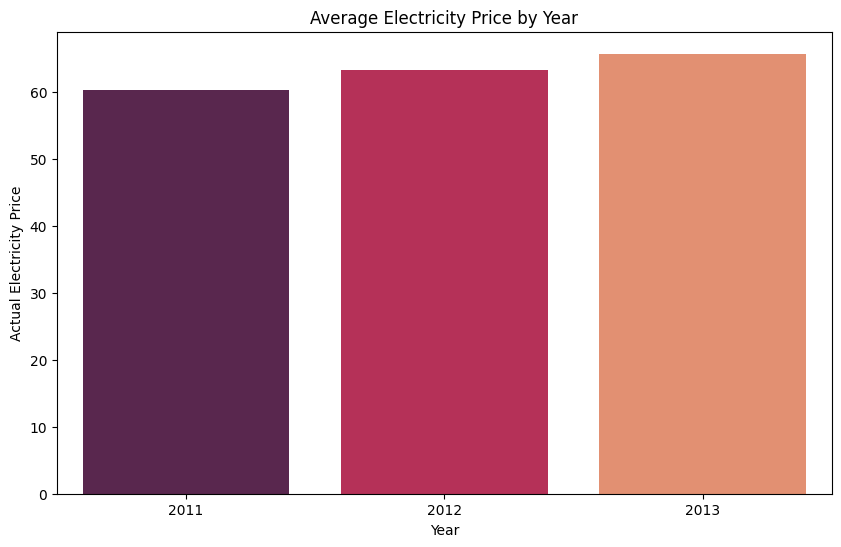

In [608]:
a = df.groupby('Year') ['ActualEP'].mean()
plt.figure(figsize = (10,6))
sns.barplot(x = a.index, y = a, palette = "rocket")
plt.xlabel("Year")
plt.ylabel("Actual Electricity Price")
plt.title("Average Electricity Price by Year")
plt.show()

The graph displays the average electricity price by year, indicating that 2013 had the highest average electricity price. This analysis highlights the year 2013 as a period characterized by higher electricity prices compared to the other two years, providing insights into annual pricing trends.

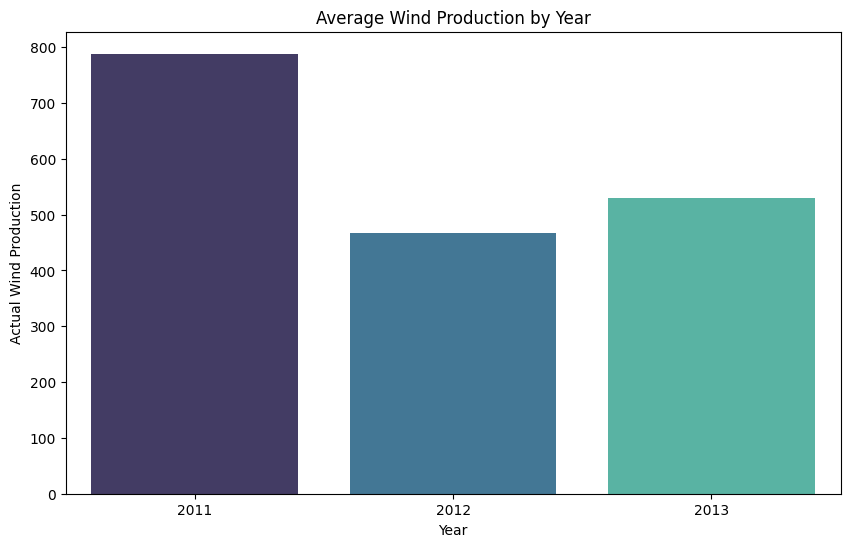

In [609]:
a = df.groupby('Year') ['ActualWindProduction'].mean()
plt.figure(figsize = (10,6))
sns.barplot(x = a.index, y = a, palette = "mako")
plt.xlabel("Year")
plt.ylabel("Actual Wind Production")
plt.title("Average Wind Production by Year")
plt.show()

The graph presents the average wind production by year, with 2011 exhibiting the highest average wind production. This suggests that in 2011, wind production was significantly high, potentially mitigating the impact of electricity prices.

The abundance of wind energy may have contributed to stabilizing electricity prices during this period, offering insights into the relationship between wind production.

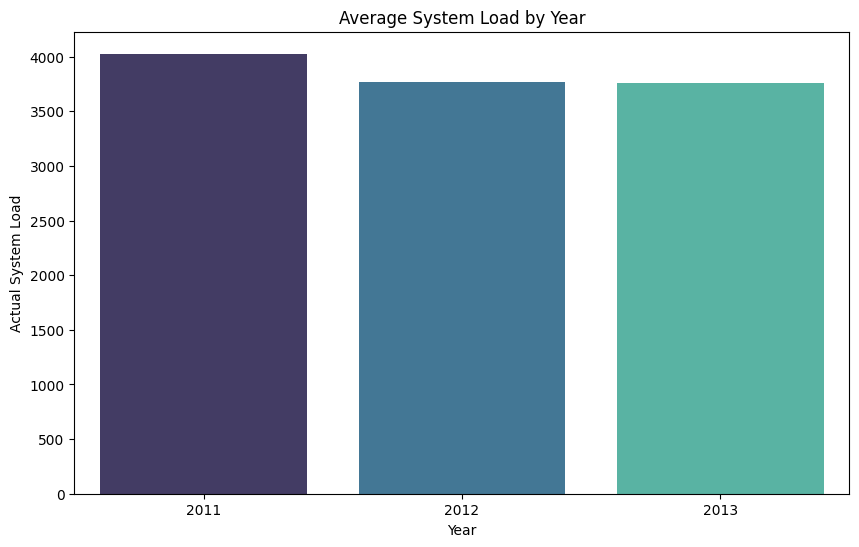

In [610]:
a = df.groupby('Year') ['ActualSystemLoad'].mean()
plt.figure(figsize = (10,6))
sns.barplot(x = a.index, y = a, palette = "mako")
plt.xlabel("Year")
plt.ylabel("Actual System Load")
plt.title("Average System Load by Year")
plt.show()

 This illustrates the average system load by year, revealing that 2011 had the highest average system load compared to the other two years. While there's no huge difference, 2011 stands out for having a slightly higher average system load.

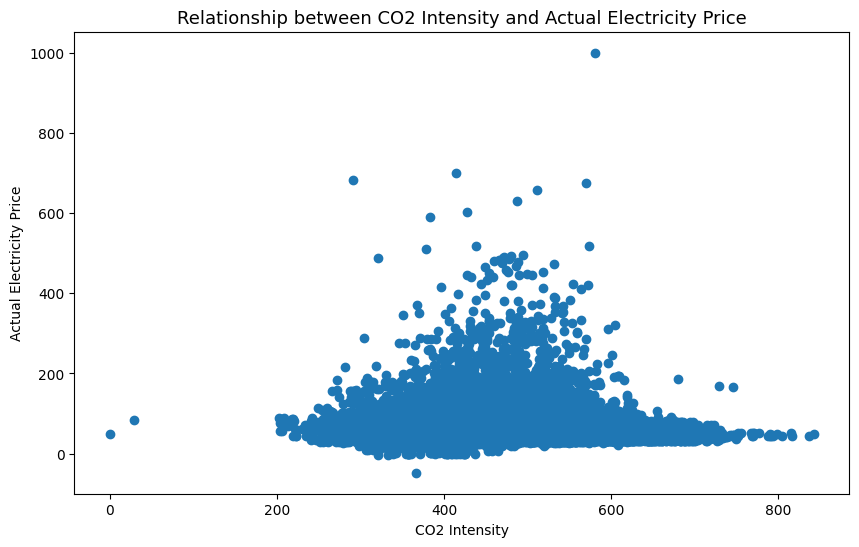

In [611]:
plt.figure(figsize = (10, 6))
plt.scatter(x = 'CO2Intensity', y = 'ActualEP', data = df)
plt.title('Relationship between CO2 Intensity and Actual Electricity Price', fontsize = 13)
plt.xlabel('CO2 Intensity', fontsize = 10)
plt.ylabel('Actual Electricity Price', fontsize = 10)
plt.show()

The scatter plot depicts the relationship between CO2 intensity and actual electricity price. Despite increases in CO2 intensity, there is no significant corresponding increase in electricity price, suggesting that CO2 intensity does not have a substantial impact on pricing dynamics.

This observation implies that factors other than CO2 intensity may play a more significant role in determining electricity prices.

**Checking Ouliers using Boxplot**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'HolidayFlag'),
  Text(1, 0, 'DayOfWeek'),
  Text(2, 0, 'WeekOfYear'),
  Text(3, 0, 'PeriodOfDay'),
  Text(4, 0, 'ForecastWindProduction'),
  Text(5, 0, 'ForecastSystemLoad'),
  Text(6, 0, 'ForecastEP'),
  Text(7, 0, 'Temperature'),
  Text(8, 0, 'Windspeed'),
  Text(9, 0, 'CO2Intensity'),
  Text(10, 0, 'ActualWindProduction'),
  Text(11, 0, 'ActualSystemLoad'),
  Text(12, 0, 'ActualEP'),
  Text(13, 0, 'Year'),
  Text(14, 0, 'Month'),
  Text(15, 0, 'Day')])

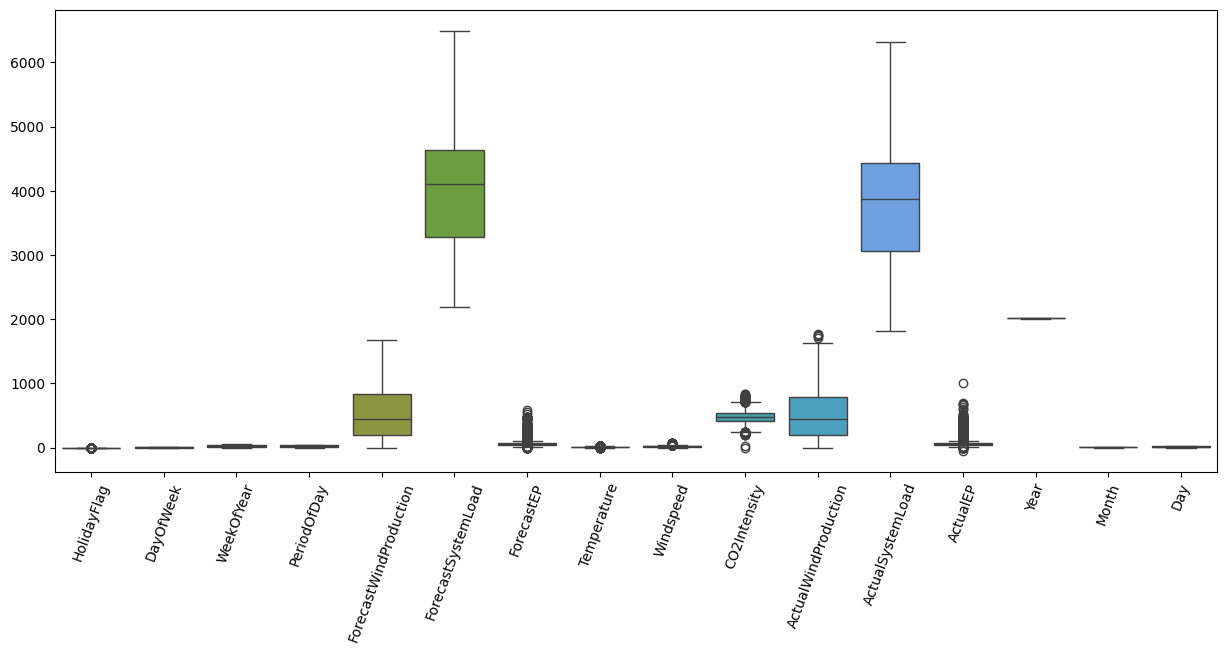

In [612]:
plt.figure(figsize = (15,6))
sns.boxplot(data = df)
plt.xticks(rotation = 70)

The boxplot reveals outliers in six columns of the dataset, including Forecasted Electricity Price, Actual Electricity Price, and CO2 Intensity. Outliers in these columns were removed to ensure data integrity and accurate analysis.

However, outliers in temperature, wind speed, and actual wind production were retained, as their wide ranges of variation are inherent to environmental factors and do not warrant removal as outliers.

 **Removing Outliers**

*1. Removing Outliers in Actual Electricity Price*

<Axes: ylabel='ActualEP'>

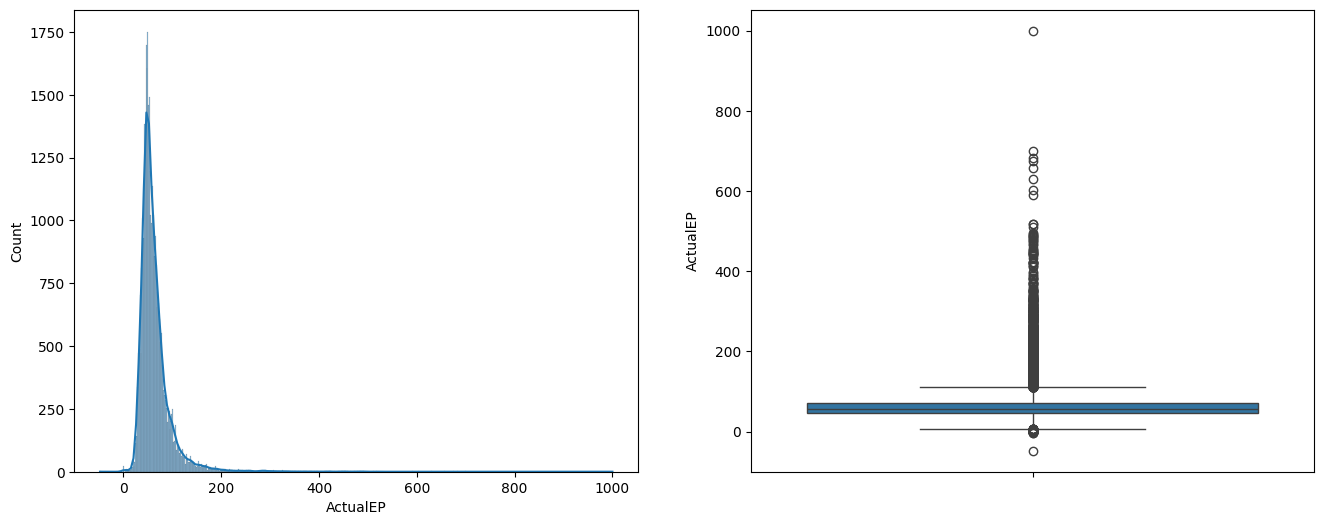

In [613]:
plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
sns.histplot(df['ActualEP'],kde = True)
plt.subplot(1,2,2)
sns.boxplot(df['ActualEP'])

In [614]:
df['ActualEP'].describe()

count    38014.000000
mean        64.136823
std         35.414105
min        -47.740000
25%         45.780000
50%         55.550000
75%         72.107500
max       1000.000000
Name: ActualEP, dtype: float64

*  **25th** Percentile is 45.8
*  **50th** Percentile is 64.18
*  **75th** Percentile is 72.12
*  The **standard deviation** is 35.43, the **minimum value** is -45.74, and the **maximum value** is 1000.


In [615]:
Q1=df['ActualEP'].quantile(0.25)
Q3=df['ActualEP'].quantile(0.75)

IQR=Q3-Q1
print('Inter Quartile Range:',IQR)

upper=Q3+1.5*IQR
lower=Q1-1.5*IQR
print('Max outliers',upper)
print('Min outliers',lower)

Inter Quartile Range: 26.3275
Max outliers 111.59875
Min outliers 6.28875


In [616]:
df[(df['ActualEP']<lower) | (df['ActualEP']>upper)].shape

(2319, 18)

<Axes: ylabel='ActualEP'>

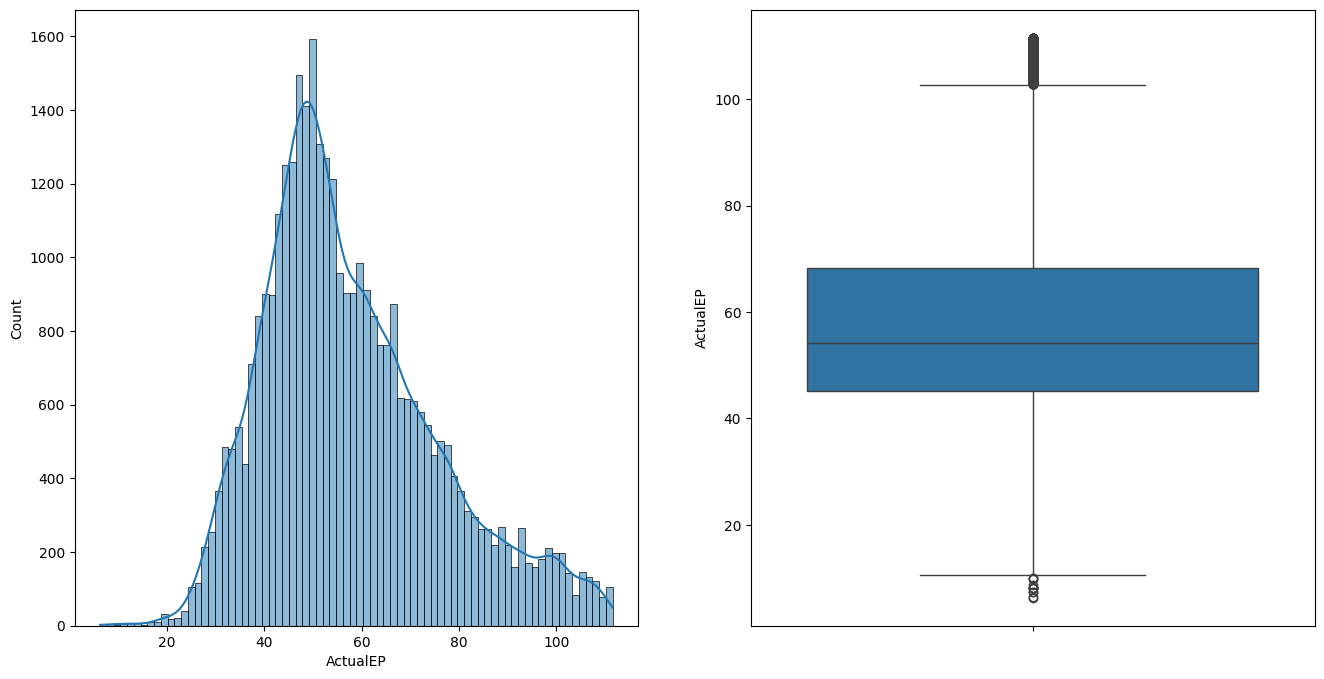

In [617]:
df = df[(df['ActualEP']>lower) & (df['ActualEP']<upper)]

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.histplot(df['ActualEP'],kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df['ActualEP'])

*2. Removing Outliers in CO2 Intensity*

<Axes: ylabel='CO2Intensity'>

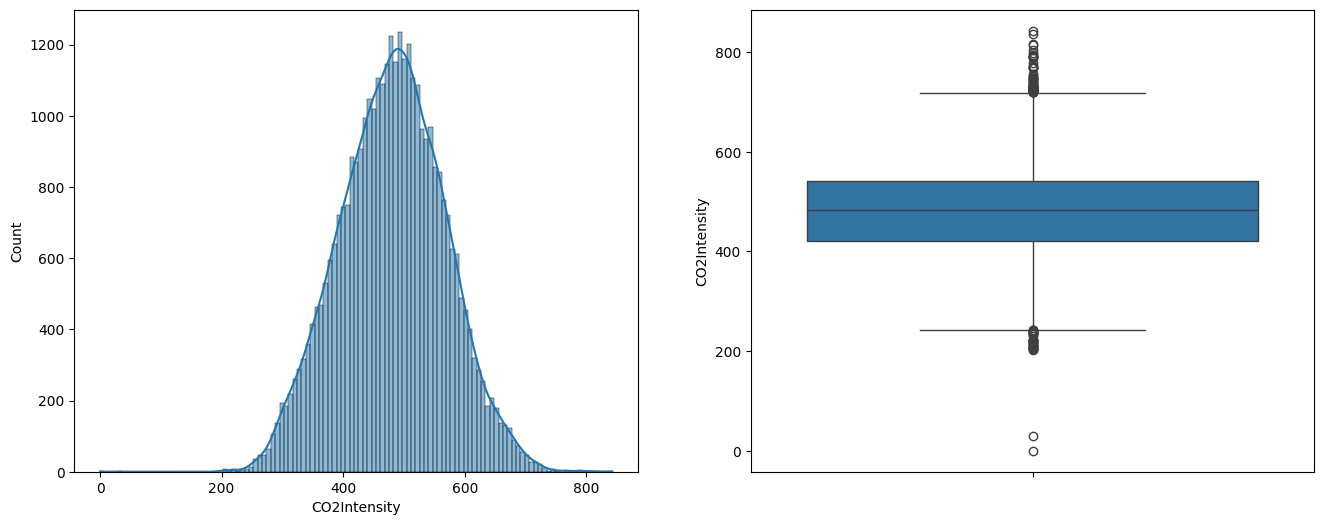

In [618]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.histplot(df['CO2Intensity'],kde=True)
plt.subplot(1,2,2)
sns.boxplot(df['CO2Intensity'])

In [619]:
df['CO2Intensity'].describe()

count    35695.000000
mean       480.675770
std         86.543123
min          0.000000
25%        421.145000
50%        482.260000
75%        540.410000
max        842.880000
Name: CO2Intensity, dtype: float64

*  **25th** Percentile is 421.275
*  **50th** Percentile is 480.35
*  **75th** Percentile is 540.44
*  The **standard deviation** is 86.36, the **minimum value** is 0, and the **maximum value** is 842.

In [620]:
Q1=df['CO2Intensity'].quantile(0.25)
Q3=df['CO2Intensity'].quantile(0.75)

IQR=Q3-Q1
print('Inter Quartile Range:',IQR)

upper=Q3+1.5*IQR
lower=Q1-1.5*IQR
print('Max outliers',upper)
print('Min outliers',lower)

Inter Quartile Range: 119.26499999999999
Max outliers 719.3074999999999
Min outliers 242.2475


In [621]:
df[(df['CO2Intensity']<lower) | (df['CO2Intensity']>upper)].shape

(102, 18)

<Axes: ylabel='CO2Intensity'>

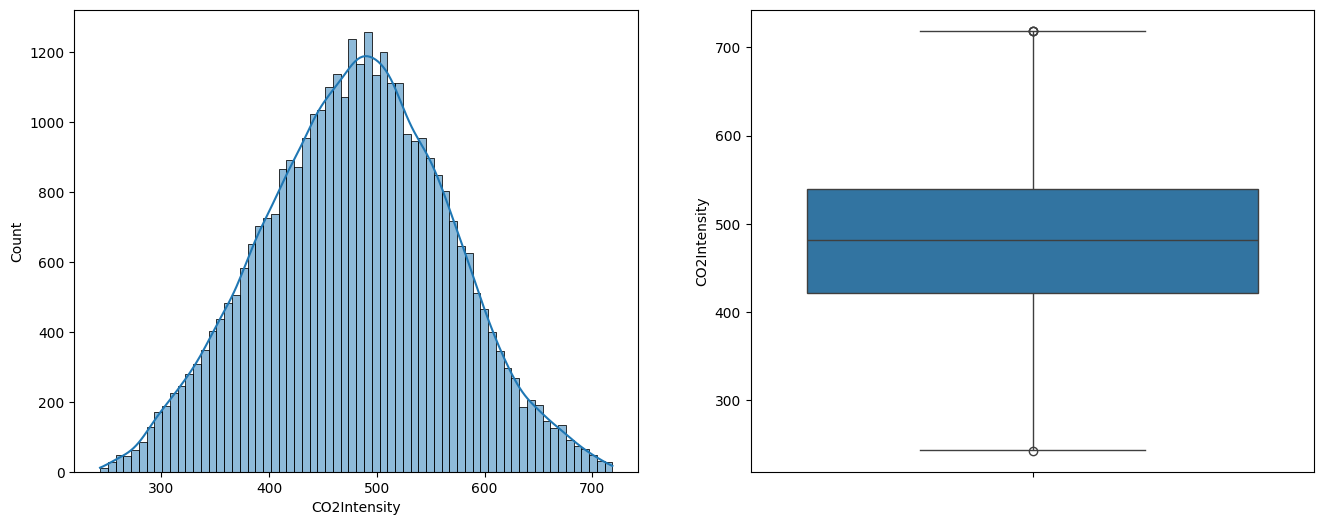

In [622]:
df=df[(df['CO2Intensity']>lower) & (df['CO2Intensity']<upper)]

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.histplot(df['CO2Intensity'],kde=True)
plt.subplot(1,2,2)
sns.boxplot(df['CO2Intensity'])

*3. Removing Outliers in Forecast Electricity Price*


<Axes: ylabel='ForecastEP'>

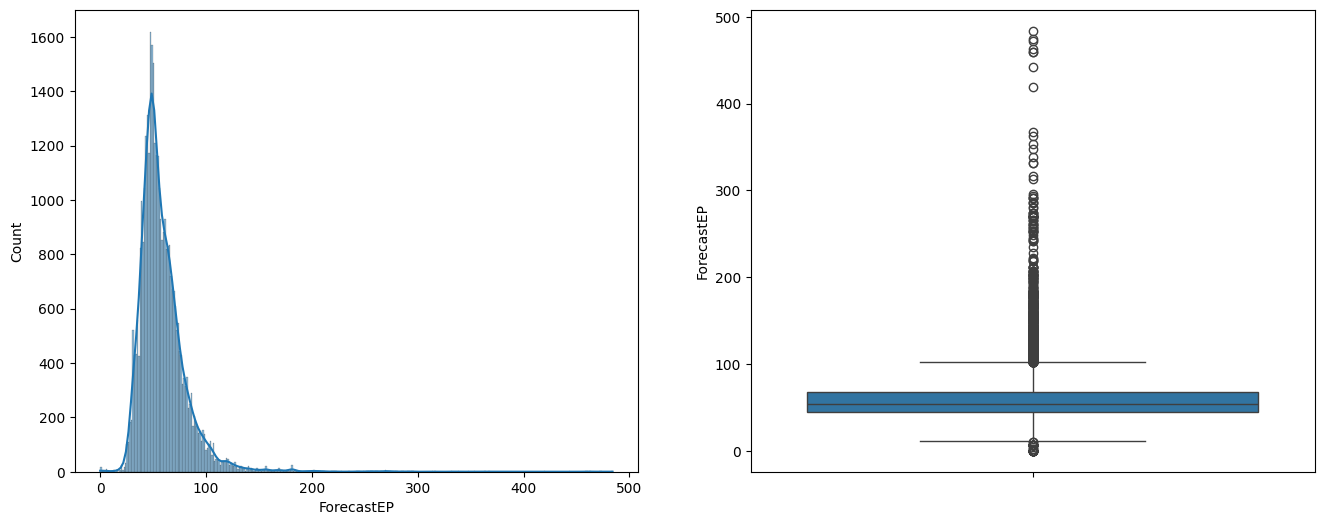

In [623]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.histplot(df['ForecastEP'],kde=True)
plt.subplot(1,2,2)
sns.boxplot(df['ForecastEP'])

In [624]:
df['ForecastEP'].describe()

count    35593.000000
mean        59.003777
std         23.505682
min          0.000000
25%         45.030000
50%         54.050000
75%         67.760000
max        484.120000
Name: ForecastEP, dtype: float64

*  **25th** Percentile is 45.03
*  **50th** Percentile is 54.045
*  **75th** Percentile is 67.76
*  The **standard deviation** is 23.5, the **minimum value** is 0, and the **maximum value** is 484.12.

In [625]:
Q1=df['ForecastEP'].quantile(0.25)
Q3=df['ForecastEP'].quantile(0.75)

IQR=Q3-Q1
print('Inter Quartile Range:',IQR)

upper=Q3+1.5*IQR
lower=Q1-1.5*IQR
print('Max outliers',upper)
print('Min outliers',lower)

Inter Quartile Range: 22.730000000000004
Max outliers 101.85500000000002
Min outliers 10.934999999999995


In [626]:
df[(df['ForecastEP']<lower) | (df['ForecastEP']>upper)].shape

(1446, 18)

<Axes: ylabel='ForecastEP'>

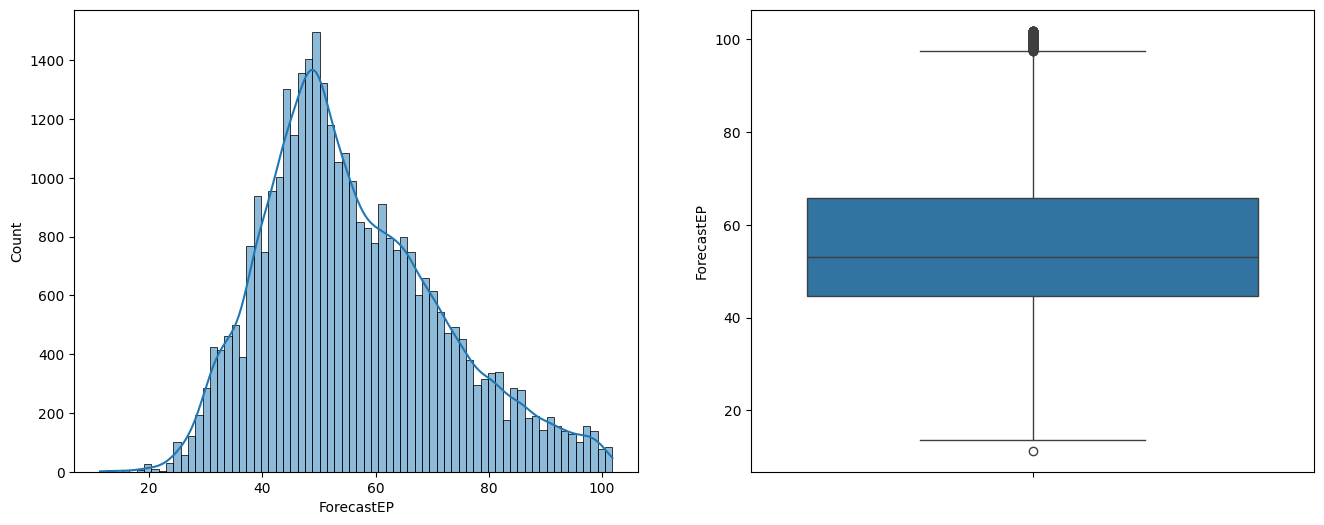

In [627]:
df=df[(df['ForecastEP']>lower) & (df['ForecastEP']<upper)]

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.histplot(df['ForecastEP'],kde=True)
plt.subplot(1,2,2)
sns.boxplot(df['ForecastEP'])

**Droping Irrelevent columns**

In [628]:
df.drop(['DateTime','Holiday'],axis=1,inplace=True)
df.head()

,HolidayFlag,DayOfWeek,WeekOfYear,PeriodOfDay,ForecastWindProduction,ForecastSystemLoad,ForecastEP,Temperature,Windspeed,CO2Intensity,ActualWindProduction,ActualSystemLoad,ActualEP,Year,Month,Day
0,0,1,44,0,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60,54.32,2011,11,1
1,0,1,44,1,321.80,3196.66,49.26,6.0,11.1,605.42,317.0,2973.01,54.23,2011,11,1
2,0,1,44,2,328.57,3060.71,49.10,5.0,11.1,589.97,311.0,2834.00,54.23,2011,11,1
3,0,1,44,3,335.60,2945.56,48.04,6.0,9.3,585.94,313.0,2725.99,53.47,2011,11,1
4,0,1,44,4,342.90,2849.34,33.75,6.0,11.1,571.52,346.0,2655.64,39.87,2011,11,1


**Checking Correlation**

In [629]:
df.corr()

,HolidayFlag,DayOfWeek,WeekOfYear,PeriodOfDay,ForecastWindProduction,ForecastSystemLoad,ForecastEP,Temperature,Windspeed,CO2Intensity,ActualWindProduction,ActualSystemLoad,ActualEP,Year,Month,Day
HolidayFlag,1.000000,-0.133885,0.002550,-0.001526,0.075983,-0.059736,-0.014271,-0.088578,0.053162,-0.062219,0.061320,-0.086467,-0.021139,-0.031652,0.035186,0.040186
DayOfWeek,-0.133885,1.000000,0.004273,0.008237,-0.036172,-0.180514,-0.094538,-0.013650,-0.052963,0.017729,-0.034365,-0.186110,-0.093533,0.010653,0.000575,-0.009254
WeekOfYear,0.002550,0.004273,1.000000,0.004739,0.052079,-0.030031,-0.026899,0.155650,-0.023441,-0.094936,0.065571,-0.044828,-0.019207,-0.229146,0.971539,0.063942
PeriodOfDay,-0.001526,0.008237,0.004739,1.000000,0.030888,0.589418,0.438535,0.178650,0.100437,-0.166490,0.060956,0.574718,0.378448,-0.005380,0.004656,0.003223
ForecastWindProduction,0.075983,-0.036172,0.052079,0.030888,1.000000,0.191119,-0.103014,-0.162733,0.708416,-0.663923,0.953429,0.037460,-0.170878,-0.050106,0.052887,0.078154
ForecastSystemLoad,-0.059736,-0.180514,-0.030031,0.589418,0.191119,1.000000,0.562101,-0.036846,0.217293,-0.201777,0.220561,0.970037,0.492479,-0.097519,-0.034990,-0.005178
ForecastEP,-0.014271,-0.094538,-0.026899,0.438535,-0.103014,0.562101,1.000000,0.192575,0.065008,-0.091274,-0.073527,0.579138,0.635052,0.088686,-0.026347,-0.030861
Temperature,-0.088578,-0.013650,0.155650,0.178650,-0.162733,-0.036846,0.192575,1.000000,0.034571,-0.076709,-0.122984,-0.025171,0.141157,0.089463,0.150307,0.017880
Windspeed,0.053162,-0.052963,-0.023441,0.100437,0.708416,0.217293,0.065008,0.034571,1.000000,-0.520667,0.724331,0.112387,-0.027125,-0.012052,-0.025099,0.093683
CO2Intensity,-0.062219,0.017729,-0.094936,-0.166490,-0.663923,-0.201777,-0.091274,-0.076709,-0.520667,1.000000,-0.684608,-0.089503,0.009260,-0.174254,-0.102666,-0.094247


<Axes: >

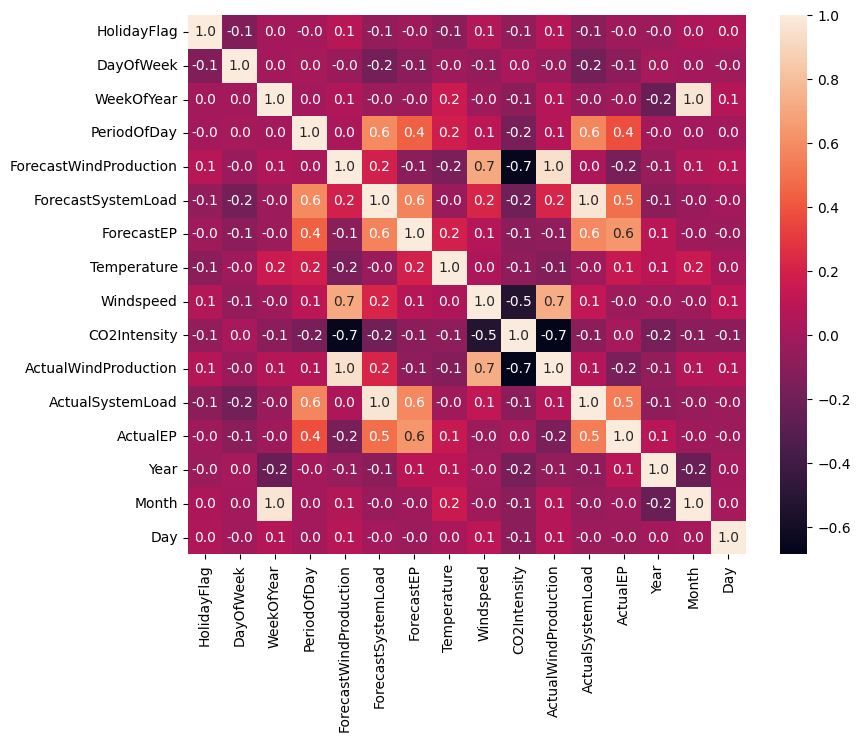

In [630]:
plt.figure(figsize = (9,7))
sns.heatmap(df.corr(),annot=True,fmt = '.1f')

In [631]:
corr=df.corr()[['ActualEP']].sort_values(by = 'ActualEP', ascending = False)
corr

,ActualEP
ActualEP,1.000000
ForecastEP,0.635052
ActualSystemLoad,0.541367
ForecastSystemLoad,0.492479
PeriodOfDay,0.378448
Temperature,0.141157
Year,0.085288
CO2Intensity,0.009260
Month,-0.014138
WeekOfYear,-0.019207


**Feature Selection**

In [632]:
from sklearn.feature_selection import f_regression
from scipy.stats import f
X=df.drop(['ActualEP'],axis = 1)
y=df['ActualEP']
f_values,p_values = f_regression(X,y)
significant_feature = X.columns[p_values > 0.05]
significant_feature

Index(['CO2Intensity'], dtype='object')

In [633]:
x=df.drop(['ActualEP','CO2Intensity'],axis=1)
x

,HolidayFlag,DayOfWeek,WeekOfYear,PeriodOfDay,ForecastWindProduction,ForecastSystemLoad,ForecastEP,Temperature,Windspeed,ActualWindProduction,ActualSystemLoad,Year,Month,Day
0,0,1,44,0,315.31,3388.77,49.26,6.0,9.3,356.0,3159.60,2011,11,1
1,0,1,44,1,321.80,3196.66,49.26,6.0,11.1,317.0,2973.01,2011,11,1
2,0,1,44,2,328.57,3060.71,49.10,5.0,11.1,311.0,2834.00,2011,11,1
3,0,1,44,3,335.60,2945.56,48.04,6.0,9.3,313.0,2725.99,2011,11,1
4,0,1,44,4,342.90,2849.34,33.75,6.0,11.1,346.0,2655.64,2011,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38009,1,1,1,43,1179.14,3932.22,34.51,6.0,22.2,812.0,3692.95,2013,12,31
38010,1,1,1,44,1152.01,3821.44,33.83,5.0,24.1,852.0,3571.00,2013,12,31
38011,1,1,1,45,1123.67,3724.21,31.75,4.0,20.4,962.0,3460.29,2013,12,31
38012,1,1,1,46,1094.24,3638.16,33.83,5.0,14.8,950.0,3563.99,2013,12,31


In [634]:
y = df['ActualEP']
y

0        54.32
1        54.23
2        54.23
3        53.47
4        39.87
         ...  
38009    42.45
38010    33.83
38011    31.75
38012    50.60
38013    34.90
Name: ActualEP, Length: 34147, dtype: float64

**Splitting Training and Testing Data**

In [635]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

# **MODEL CREATION**

# Linear Regression





In [636]:
from sklearn.linear_model import LinearRegression
LR_model=LinearRegression()
LR_model.fit(x_train,y_train)
y_pred=LR_model.predict(x_test)
y_pred

array([51.23905558, 70.43866956, 37.67868908, ..., 63.14081915,
       40.10985752, 67.86823507])

In [637]:
print('MAE is',mean_absolute_error(y_test,y_pred))
print('MAPE is',mean_absolute_percentage_error(y_test,y_pred))
print('MSE is',mean_squared_error(y_test,y_pred))
print('RMSE is',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_score is',r2_score(y_test,y_pred))

MAE is 9.361675905066903
MAPE is 0.1685743182563913
MSE is 158.80213370416655
RMSE is 12.60167186147007
R2_score is 0.4841028531286118


In [638]:
df1=pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred,'Difference':y_test-y_pred})
df1

,Actual_value,Predicted_value,Difference
29853,60.88,51.239056,9.640944
11891,52.69,70.438670,-17.748670
17390,47.92,37.678689,10.241311
20350,55.89,42.078502,13.811498
2694,44.10,57.172463,-13.072463
...,...,...,...
23147,52.88,56.949707,-4.069707
26469,65.38,64.009329,1.370671
25072,78.52,63.140819,15.379181
35431,56.37,40.109858,16.260142


# K-Nearest Neighbors

In [639]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
param={'n_neighbors':[3,5,7,9],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
gd=GridSearchCV(knn,param,cv=10,scoring='r2')
gd.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [640]:
print(gd.best_params_)

{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}


In [641]:
KNN_model=KNeighborsRegressor(n_neighbors=9,weights='distance',algorithm='auto')
KNN_model.fit(x_train,y_train)
y_pred=KNN_model.predict(x_test)
y_pred

array([45.38067087, 79.36129264, 41.99272846, ..., 65.56915784,
       54.48312306, 67.02041243])

In [642]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
print('MAE is',mean_absolute_error(y_test,y_pred))
print('MAPE is',mean_absolute_percentage_error(y_test,y_pred))
print('MSE is',mean_squared_error(y_test,y_pred))
print('RMSE is',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_score is',r2_score(y_test,y_pred))

MAE is 9.814909262310572
MAPE is 0.17698297772267982
MSE is 171.1883469775075
RMSE is 13.083896475343556
R2_score is 0.44386402296175076


In [643]:
df2=pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred,'Difference':y_test-y_pred})
df2

,Actual_value,Predicted_value,Difference
29853,60.88,45.380671,15.499329
11891,52.69,79.361293,-26.671293
17390,47.92,41.992728,5.927272
20350,55.89,36.392736,19.497264
2694,44.10,48.422422,-4.322422
...,...,...,...
23147,52.88,59.873784,-6.993784
26469,65.38,41.161820,24.218180
25072,78.52,65.569158,12.950842
35431,56.37,54.483123,1.886877


# GradientBoost Regressor

In [644]:
from sklearn.ensemble import GradientBoostingRegressor
GB_model=GradientBoostingRegressor()
GB_model.fit(x_train,y_train)
y_pred=GB_model.predict(x_test)
y_pred

array([54.62010471, 70.96557512, 39.77091357, ..., 70.95595413,
       38.02387111, 66.94539009])

In [645]:
print('MAE is',mean_absolute_error(y_test,y_pred))
print('MAPE is',mean_absolute_percentage_error(y_test,y_pred))
print('MSE is',mean_squared_error(y_test,y_pred))
print('RMSE is',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_score is',r2_score(y_test,y_pred))

MAE is 8.688613423461756
MAPE is 0.15589145632690782
MSE is 137.4974996808562
RMSE is 11.725932785107384
R2_score is 0.5533147689347313


In [646]:
df3=pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred,'Difference':y_test-y_pred})
df3

,Actual_value,Predicted_value,Difference
29853,60.88,54.620105,6.259895
11891,52.69,70.965575,-18.275575
17390,47.92,39.770914,8.149086
20350,55.89,41.701493,14.188507
2694,44.10,54.587857,-10.487857
...,...,...,...
23147,52.88,53.315091,-0.435091
26469,65.38,71.892896,-6.512896
25072,78.52,70.955954,7.564046
35431,56.37,38.023871,18.346129


# Decision Tree Regressor

In [647]:
from sklearn.tree import DecisionTreeRegressor
DT_model=DecisionTreeRegressor()
DT_model.fit(x_train,y_train)
y_pred=DT_model.predict(x_test)
y_pred

array([48.  , 81.81, 43.7 , ..., 72.16, 56.37, 52.98])

In [648]:
print('MAE is',mean_absolute_error(y_test,y_pred))
print('MAPE is',mean_absolute_percentage_error(y_test,y_pred))
print('MSE is',mean_squared_error(y_test,y_pred))
print('RMSE is',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_score is',r2_score(y_test,y_pred))

MAE is 5.753490483162519
MAPE is 0.1026986306870481
MSE is 124.19240571010249
RMSE is 11.144164648375511
R2_score is 0.5965387474686384


In [649]:
df4=pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred,'Difference':y_test-y_pred})
df4

,Actual_value,Predicted_value,Difference
29853,60.88,48.00,12.88
11891,52.69,81.81,-29.12
17390,47.92,43.70,4.22
20350,55.89,52.70,3.19
2694,44.10,44.10,0.00
...,...,...,...
23147,52.88,52.07,0.81
26469,65.38,64.19,1.19
25072,78.52,72.16,6.36
35431,56.37,56.37,0.00


# Random Forest Regressor

In [650]:
# from sklearn.ensemble import RandomForestRegressor
# rfr= RandomForestRegressor()
# param= {'n_estimators': [100, 200],'max_depth': [None, 10],'min_samples_split': [2, 5],'min_samples_leaf': [1, 2]}
# gd=GridSearchCV(rfr,param,cv=5,scoring='r2')
# gd.fit(x_train,y_train)

In [ ]:
print(gd.best_params_)

In [652]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(max_depth=None,min_samples_leaf=1,min_samples_split=2,n_estimators=200)
RF_model.fit(x_train, y_train)
y_pred = RF_model.predict(x_test)
y_pred

array([51.21155, 83.063  , 38.39265, ..., 72.10555, 48.3011 , 59.0448 ])

In [653]:
print('MAE is',mean_absolute_error(y_test,y_pred))
print('MAPE is',mean_absolute_percentage_error(y_test,y_pred))
print('MSE is',mean_squared_error(y_test,y_pred))
print('RMSE is',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_score is',r2_score(y_test,y_pred))

MAE is 4.869140395999627
MAPE is 0.08781105996922976
MSE is 58.72230491843165
RMSE is 7.663048017494843
R2_score is 0.8092300848956684


In [654]:
df5=pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred,'Difference':y_test-y_pred})
df5

,Actual_value,Predicted_value,Difference
29853,60.88,51.21155,9.66845
11891,52.69,83.06300,-30.37300
17390,47.92,38.39265,9.52735
20350,55.89,46.13760,9.75240
2694,44.10,44.54060,-0.44060
...,...,...,...
23147,52.88,56.49955,-3.61955
26469,65.38,75.85575,-10.47575
25072,78.52,72.10555,6.41445
35431,56.37,48.30110,8.06890


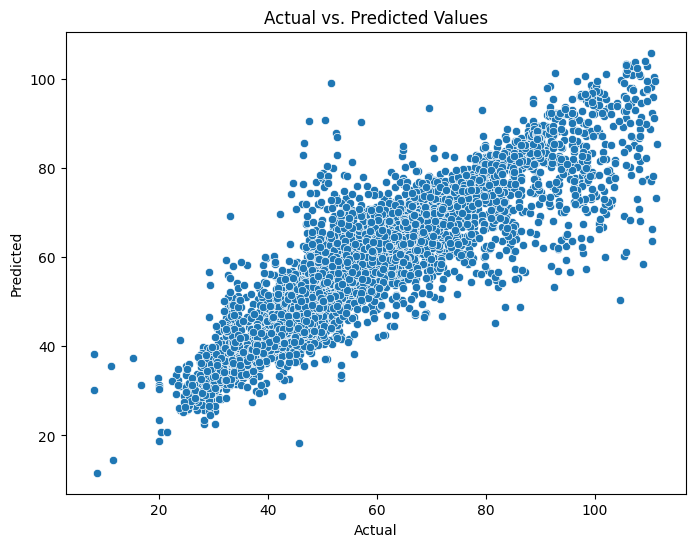

In [655]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

In [656]:
Model = ["LinearRegression","KNeighborsRegressor","GradientBoostRegressor","DecisionTreeRegressor","RandomForestRegressor"]
model = [LR_model,KNN_model,GB_model,DT_model,RF_model]
accuracy_lst = []
for i in model:
  i.fit(x_train,y_train)
  y_pred = i.predict(x_test)
  score = r2_score(y_test,y_pred)
  accuracy_lst.append(score)

In [657]:
accuracy_lst

[0.4841028531286118,
 0.44386402296175076,
 0.5533147689347313,
 0.5864446421553156,
 0.8091334641577678]

In [658]:
model_df = pd.DataFrame({'Model':Model, 'Accuracy':accuracy_lst})
best_model = model_df.sort_values(by = "Accuracy",ascending = False)
best_model

,Model,Accuracy
4,RandomForestRegressor,0.809133
3,DecisionTreeRegressor,0.586445
2,GradientBoostRegressor,0.553315
0,LinearRegression,0.484103
1,KNeighborsRegressor,0.443864


<Axes: xlabel='Model', ylabel='Accuracy'>

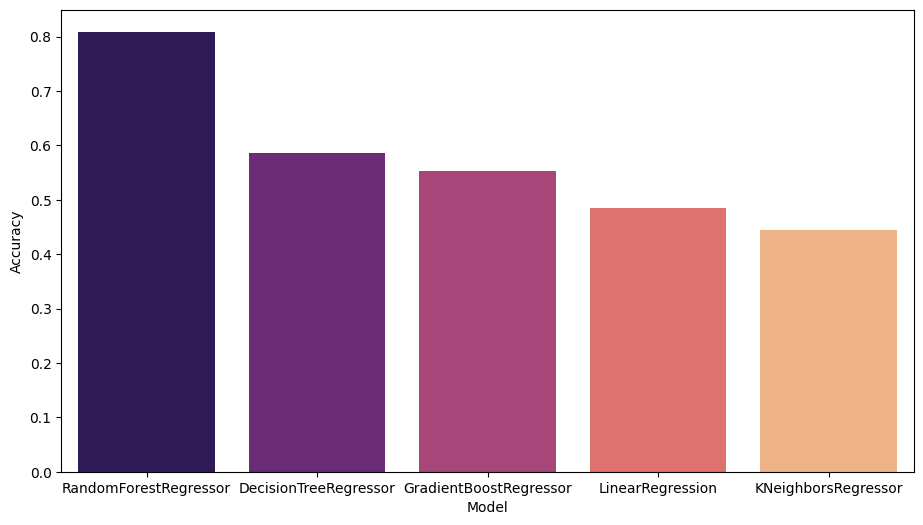

In [659]:
plt.figure(figsize = (11,6))
sns.barplot(x= best_model['Model'], y=best_model['Accuracy'], palette = 'magma')